In [1]:
#panggil library yang dibutuhkan
from Bio import SeqIO
import matplotlib.pyplot as plt

In [2]:
#membaca file fasta
apoe = list(SeqIO.parse("APOE-Acipenser.fasta", "fasta"))
seqApoe = apoe[0].seq

In [3]:
#mendefinisikan fungsi untuk menghitung jumlah basa per komponen
def count_seq(seq):
    countA = seq.count("A")
    countC = seq.count("C")
    countG = seq.count("G")
    countT = seq.count("T")
    return {
        "A": countA,
        "C": countC,
        "G": countG,
        "T": countT
    }

#mendefinisikan fungsi untuk menghitung persentase basa per komponen
def percentage_seq(seq):
    percentage_seqA = round(seq.count("A") / len(seq) * 100,2) 
    percentage_seqC = round(seq.count("C") / len(seq) * 100,2)
    percentage_seqG = round(seq.count("G") / len(seq) * 100,2)
    percentage_seqT = round(seq.count("T") / len(seq) * 100,2)
    return {
        "A": percentage_seqA,
        "C": percentage_seqC,
        "G": percentage_seqG,
        "T": percentage_seqT
    }

# mendefinisikan fungsi untuk menghitung GC skewness
# menghitung GC skewness dengan rumus (G-C)/(G+C)
# window adalah panjang sekuens yang akan dihitung GC skewnessnya
# skewness melihat komposisis basa mana yang lebih banyak
# jika skewness > 0 maka basa GC lebih banyak      
def gc_skew(dna, window=5):
    skews = []
    for i in range(0, len(dna), window):
        subseq = dna[i:i+window]
        g_count = subseq.count('G')
        c_count = subseq.count('C')
        if g_count + c_count !=0:
            skew = (g_count - c_count)/(g_count + c_count) 
            skews.append(skew)
        else:
            skews.append(0)

    return skews

In [4]:
#cetak hasil analisis
print("komponen masing - masing basa")
print(count_seq(seqApoe))
print("persentase masing - masing basa")
print(percentage_seq(seqApoe))

komponen masing - masing basa
{'A': 43, 'C': 33, 'G': 40, 'T': 22}
persentase masing - masing basa
{'A': 31.16, 'C': 23.91, 'G': 28.99, 'T': 15.94}


In [5]:
#panggil gungsi gc_skew dan tampung dalam variabel
apoE_gc_skew = gc_skew(seqApoe)

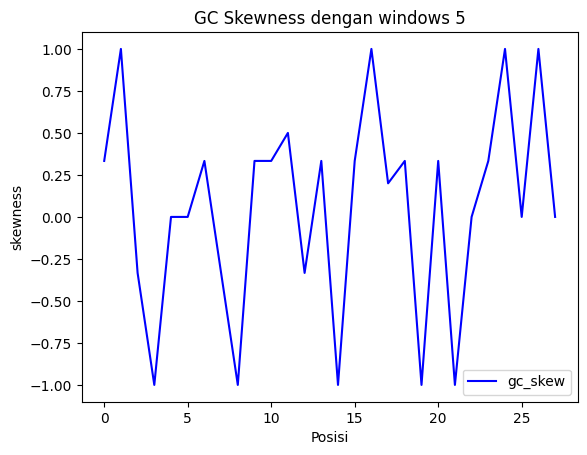

In [6]:
#buat plot untuk ditampilkan
plt.plot(apoE_gc_skew, label='gc_skew' , color = 'blue')

plt.xlabel('Posisi')
plt.ylabel('skewness')
plt.title('GC Skewness dengan windows 5')

plt.legend()
plt.show()